In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r"C:\Users\Nandan G\python_practice\heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [19]:
print('shape of the dataset',df.shape)

shape of the dataset (908, 13)


In [20]:
#describe statistice
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [22]:
#missing values
print('missing values:\n',df.isnull().sum())

missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


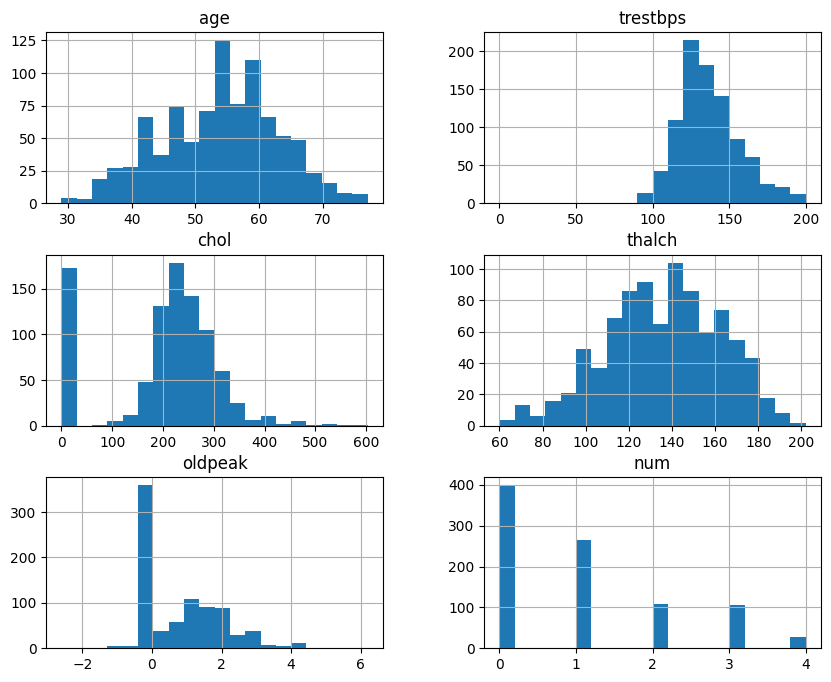

In [23]:
#visulaize distribution with histogram
import matplotlib.pyplot as plt
df.hist(figsize=(10,8),bins=20)
plt.show()

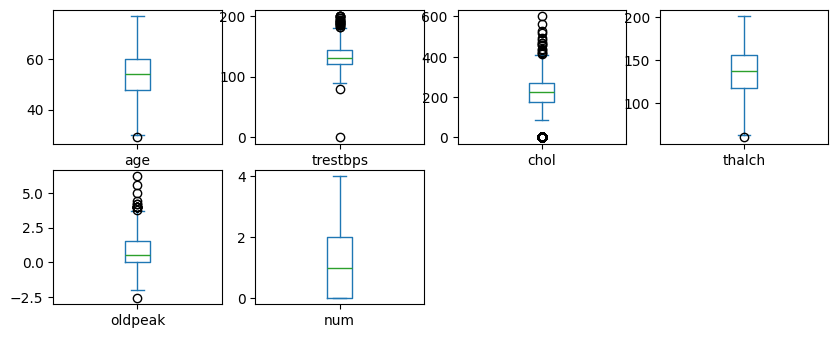

In [24]:
df.plot(kind='box',figsize=(10,8),subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

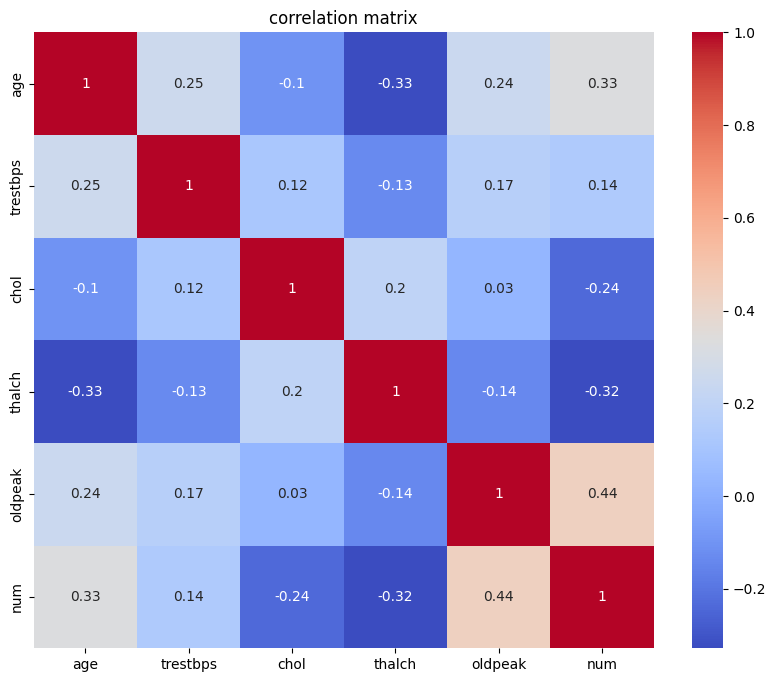

In [25]:
df_numeric=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

#handle missing values
df=df.dropna()

df_numeric=df.select_dtypes(include=['object']).columns
df_numeric



Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [27]:
#encode categorical features
labelencoder=LabelEncoder()
cat=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
for col in cat:
    df[col]=labelencoder.fit_transform(df[col])
df[col]


0      0
1      0
2      0
3      0
4      0
      ..
901    0
902    1
903    0
904    1
905    1
Name: thal, Length: 846, dtype: int32

In [28]:
df=pd.get_dummies(df,drop_first=True)

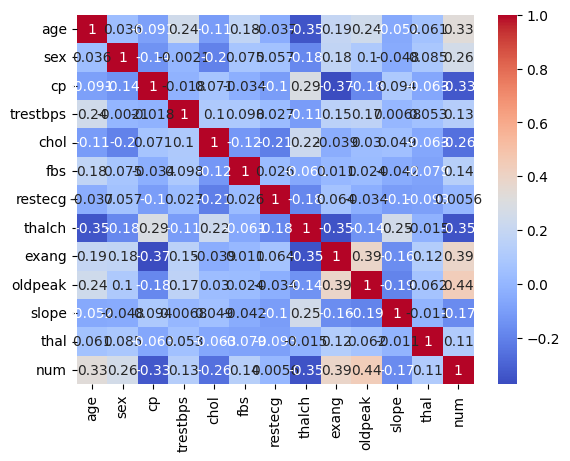

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [30]:
#outliers
import numpy as np
from scipy import stats
z_score=np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers=df[(z_score<3).all(axis=1)]

#check the cleaned dataset
print('cleaned data:\n',df_no_outliers.head())

cleaned data:
    age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      0      2.3   
1   41    1   1       135   203  False        1     132      0      0.0   
2   57    1   0       140   192  False        1     148      0      0.4   
3   52    1   3       118   186  False        0     190      0      0.0   
4   57    1   0       110   201  False        1     126      1      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  


In [31]:
#scale numerical feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)


In [32]:
scaler

StandardScaler()

In [33]:
scaled_data

array([[ 1.05284932,  0.53634992,  2.358435  , ..., -1.67799828,
        -1.57527188, -0.86862112],
       [-1.36636445,  0.53634992,  0.24930603, ..., -0.2249926 ,
        -1.57527188, -0.86862112],
       [ 0.39306375,  0.53634992, -0.80525846, ..., -0.2249926 ,
        -1.57527188, -0.86862112],
       ...,
       [-0.0467933 ,  0.53634992, -0.80525846, ...,  1.22801307,
        -1.57527188,  2.67711334],
       [ 0.94288506,  0.53634992, -0.80525846, ..., -0.2249926 ,
        -0.24922212,  2.67711334],
       [ 0.28309948,  0.53634992,  1.30387051, ..., -1.67799828,
        -0.24922212,  2.67711334]])

####  Decision Tree Classification:
*
Split the dataset into training and testing sets (e.g., using an 80-20 split)
*
Implement a Decision Tree Classification model using a library like scikit-lear
* .
Train the model on the training set and evaluate its performance on the test
* ng set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [34]:
from sklearn.model_selection import train_test_split
x=df.drop('num',axis=1)
y=df['num']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
#implememt model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 3, 0, 0, 1, 0, 1, 0,
       3, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 4, 0, 1, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 1, 1, 0, 4, 0, 0,
       2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 4, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 2, 0, 0, 0, 0, 3, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 3, 1, 0,
       2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 3, 1, 3, 0, 1, 0, 3, 0, 0,
       3, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 0, 1, 3, 0], dtype=int64)

In [38]:
#model evaluation
print('Accuracy:',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.5764705882352941
confusion matrix:
 [[63 11  3  2  1]
 [14 20  5  2  0]
 [ 3  3  7  1  0]
 [ 2 14  3  7  1]
 [ 1  3  0  3  1]]
classification report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        80
           1       0.39      0.49      0.43        41
           2       0.39      0.50      0.44        14
           3       0.47      0.26      0.33        27
           4       0.33      0.12      0.18         8

    accuracy                           0.58       170
   macro avg       0.47      0.43      0.43       170
weighted avg       0.57      0.58      0.57       170



In [39]:
#5. Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [40]:
best_model=grid_search.best_estimator_
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [41]:
#model evaluation and analysis
y_pred_best=best_model.predict(x_test)

print('tuned model Accuracy:',accuracy_score(y_test,y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

tuned model Accuracy: 0.5764705882352941
Confusion Matrix:
 [[72  8  0  0  0]
 [15 26  0  0  0]
 [ 1 13  0  0  0]
 [ 4 23  0  0  0]
 [ 2  6  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.34      0.63      0.44        41
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         8

    accuracy                           0.58       170
   macro avg       0.22      0.31      0.25       170
weighted avg       0.44      0.58      0.50       170



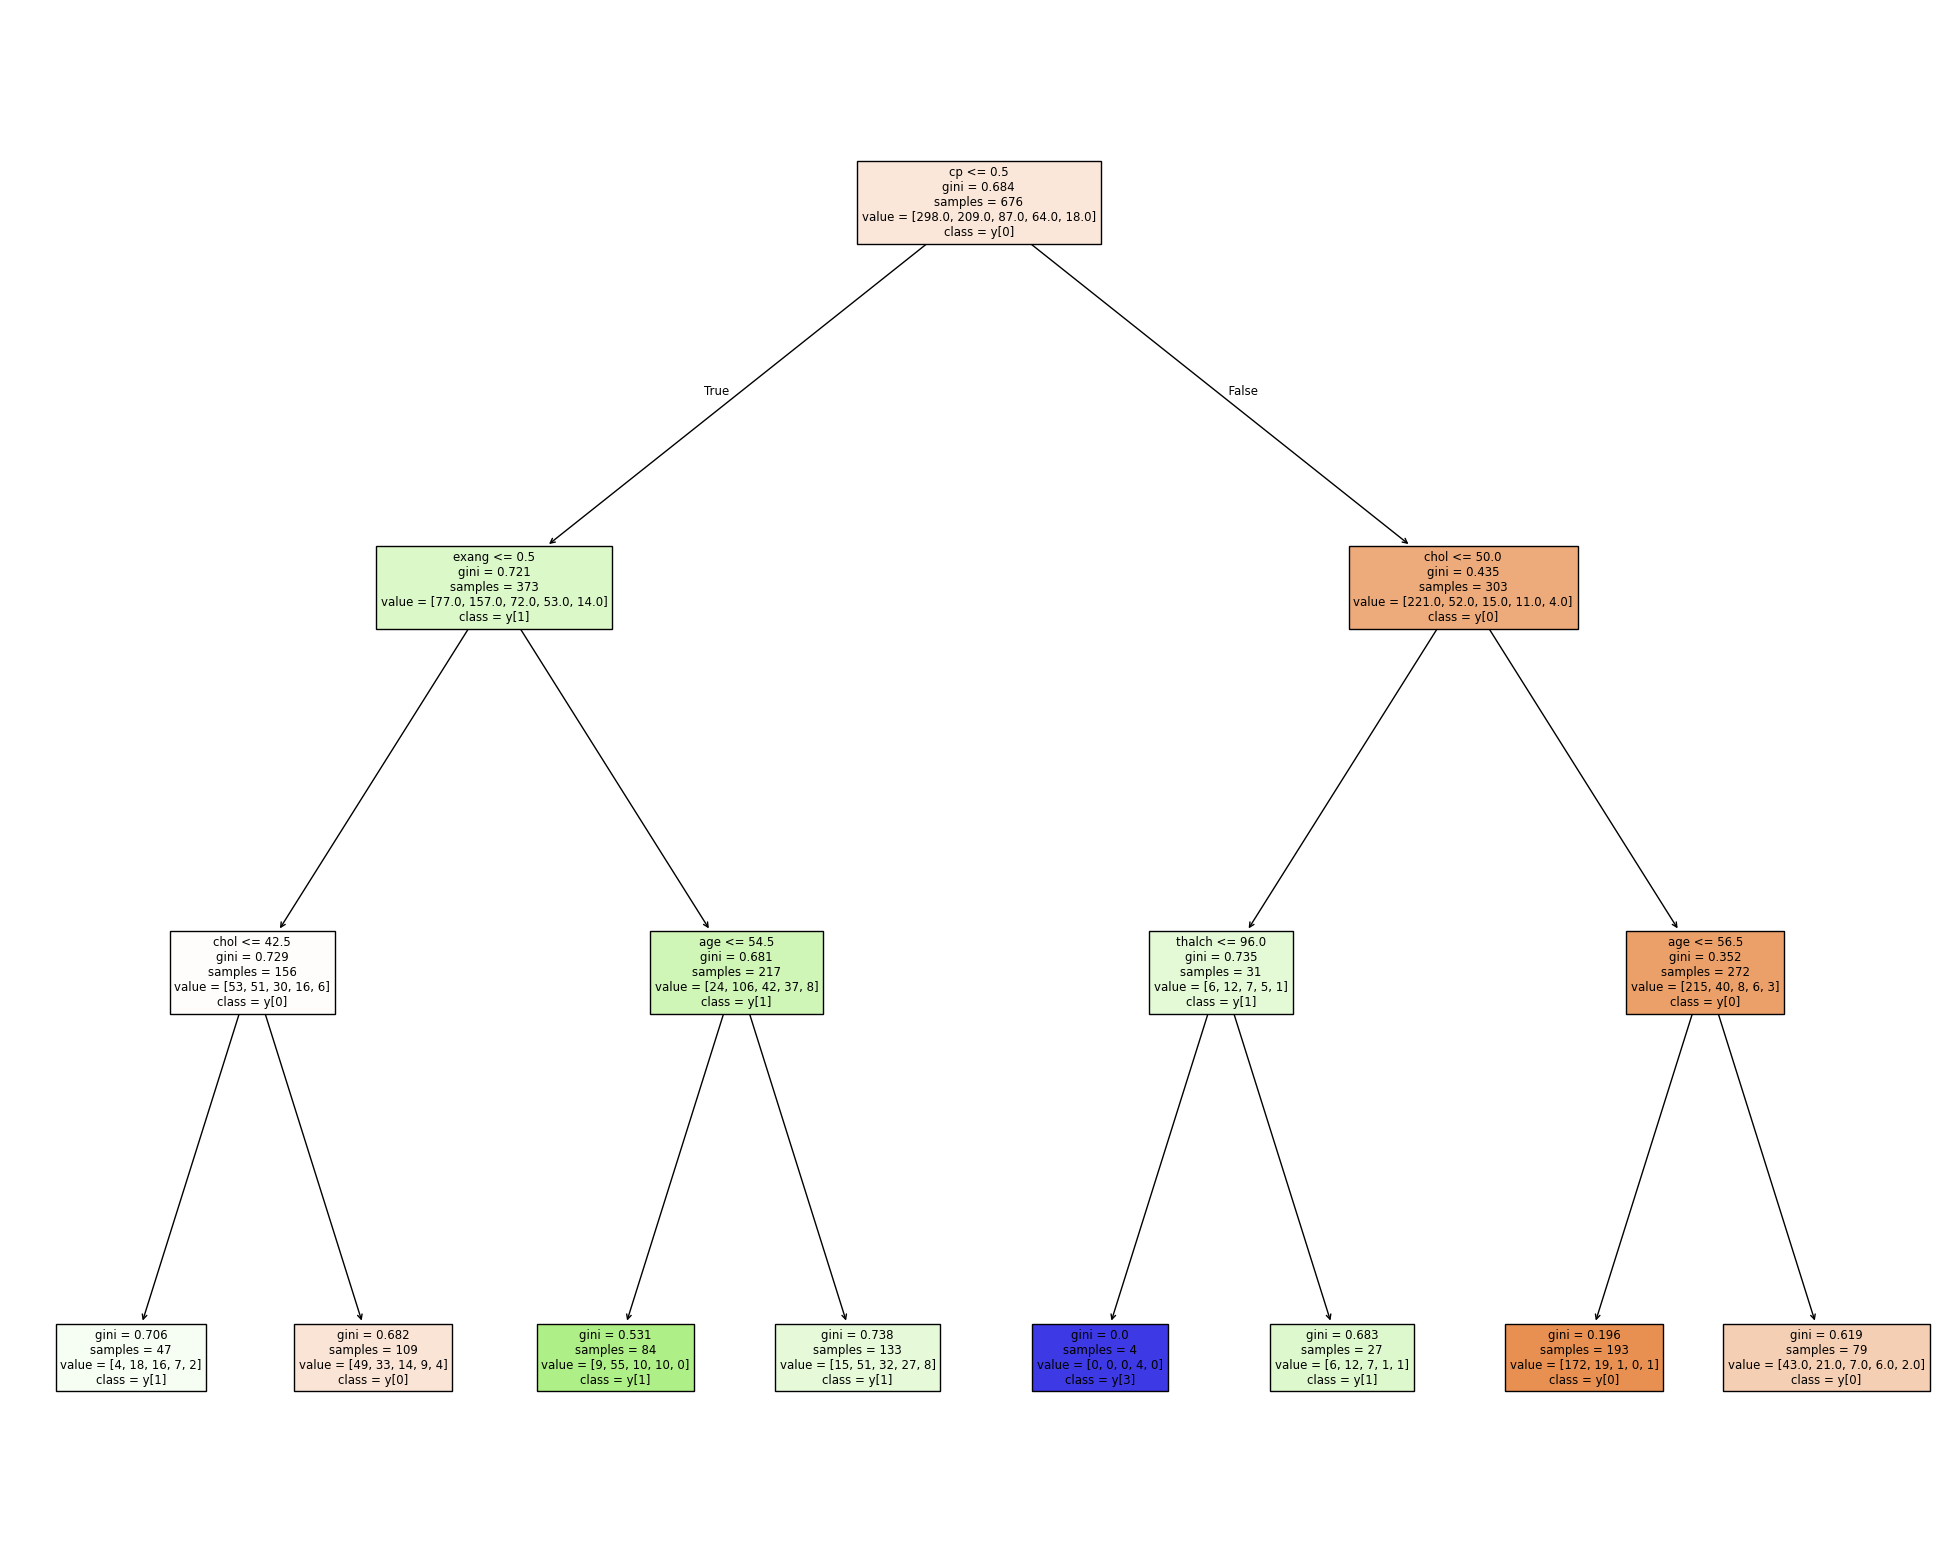

In [41]:
#visualize the decision tree structure
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(best_model,filled=True,feature_names=x.columns,class_names=True)
plt.show()

##### Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance??-- Here are some common hyperparameters of decision tree models and how they affect the model's performance:

Criterion: This hyperparameter determines the function to measure the quality of a split. The two most common criteria are "gini" for the Gini impurity and "entropy" for the information gain. Gini impurity tends to be faster to compute, while entropy may create more balanced trees.

Max Depth: This hyperparameter restricts the maximum depth of the decision tree. A deeper tree can capture more complex patterns in the data but is also more prone to overfitting, especially with noisy datasets. Limiting the depth can help prevent overfitting.

Min Samples Split: This hyperparameter determines the minimum number of samples required to split an internal node. Setting a higher value for this parameter can prevent the model from making splits that only capture noise in the data, reducing overfitting.

Min Samples Leaf: This hyperparameter sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, it helps control overfitting by preventing the model from creating leaves with very few samples.

Max Features: This hyperparameter controls the number of features to consider when looking for the best split. It can help prevent overfitting and reduce the computational cost, especially for datasets with a large number of features.

Splitter: This hyperparameter determines the strategy used to choose the split at each node. The two options are "best" to choose the best split and "random" to choose the best random split. Using "random" can help prevent overfitting.

Class Weight: This hyperparameter assigns weights to classes to address class imbalance. It can be useful when the classes are unevenly distributed in the dataset.

Random State: This hyperparameter controls the randomness of the algorithm. Setting a random state ensures reproducibility of results across multiple runs.




2. What is the difference between the Label encoding and One-hot encoding?


Label encoding assigns a unique integer label to each category, while one-hot encoding represents each category with a binary vector. One-hot encoding is more commonly used in machine learning models, especially when dealing with nominal categorical variables, as it avoids introducing spurious relationships between categories.

1.Label Encoding: In label encoding, each category is assigned a unique integer label. The labels are typically assigned in alphabetical order or based on the frequency of occurrence in the dataset. Label encoding is suitable for ordinal categorical variables, where there is a meaningful order among the categories. However, using label encoding for nominal categorical variables (where there is no inherent order) can introduce unintended relationships between categories. Example: In a dataset with colors as a categorical variable, label encoding might assign "red" as 0, "blue" as 1, and "green" as

One-Hot Encoding: In one-hot encoding, each category is represented by a binary vector where only one element is 1 (hot), and all others are 0 (cold). Each binary vector has a length equal to the number of unique categories in the original variable. One-hot encoding is suitable for nominal categorical variables, where there is no inherent order among the categories. One-hot encoding avoids introducing unintended relationships between categories, making it more suitable for machine learning algorithms. Example: Using one-hot encoding on the same color variable would create three binary variables: "red" represented as [1, 0, 0], "blue" as [0, 1, 0], and "green" as [0, 0, 1].
